In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('/content/mushroom.csv')

In [47]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


Unnamed: 0	can removed this does not provide any valuable information data

In [48]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

As per the Mushroom dataset, the goal is to detect the mushroom is poisonous or edible(Class) which is the Target.

# EDA

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

In [50]:
df.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


There are no missing values in Mushroom Dataset

In [51]:
color = sns.color_palette("pastel")

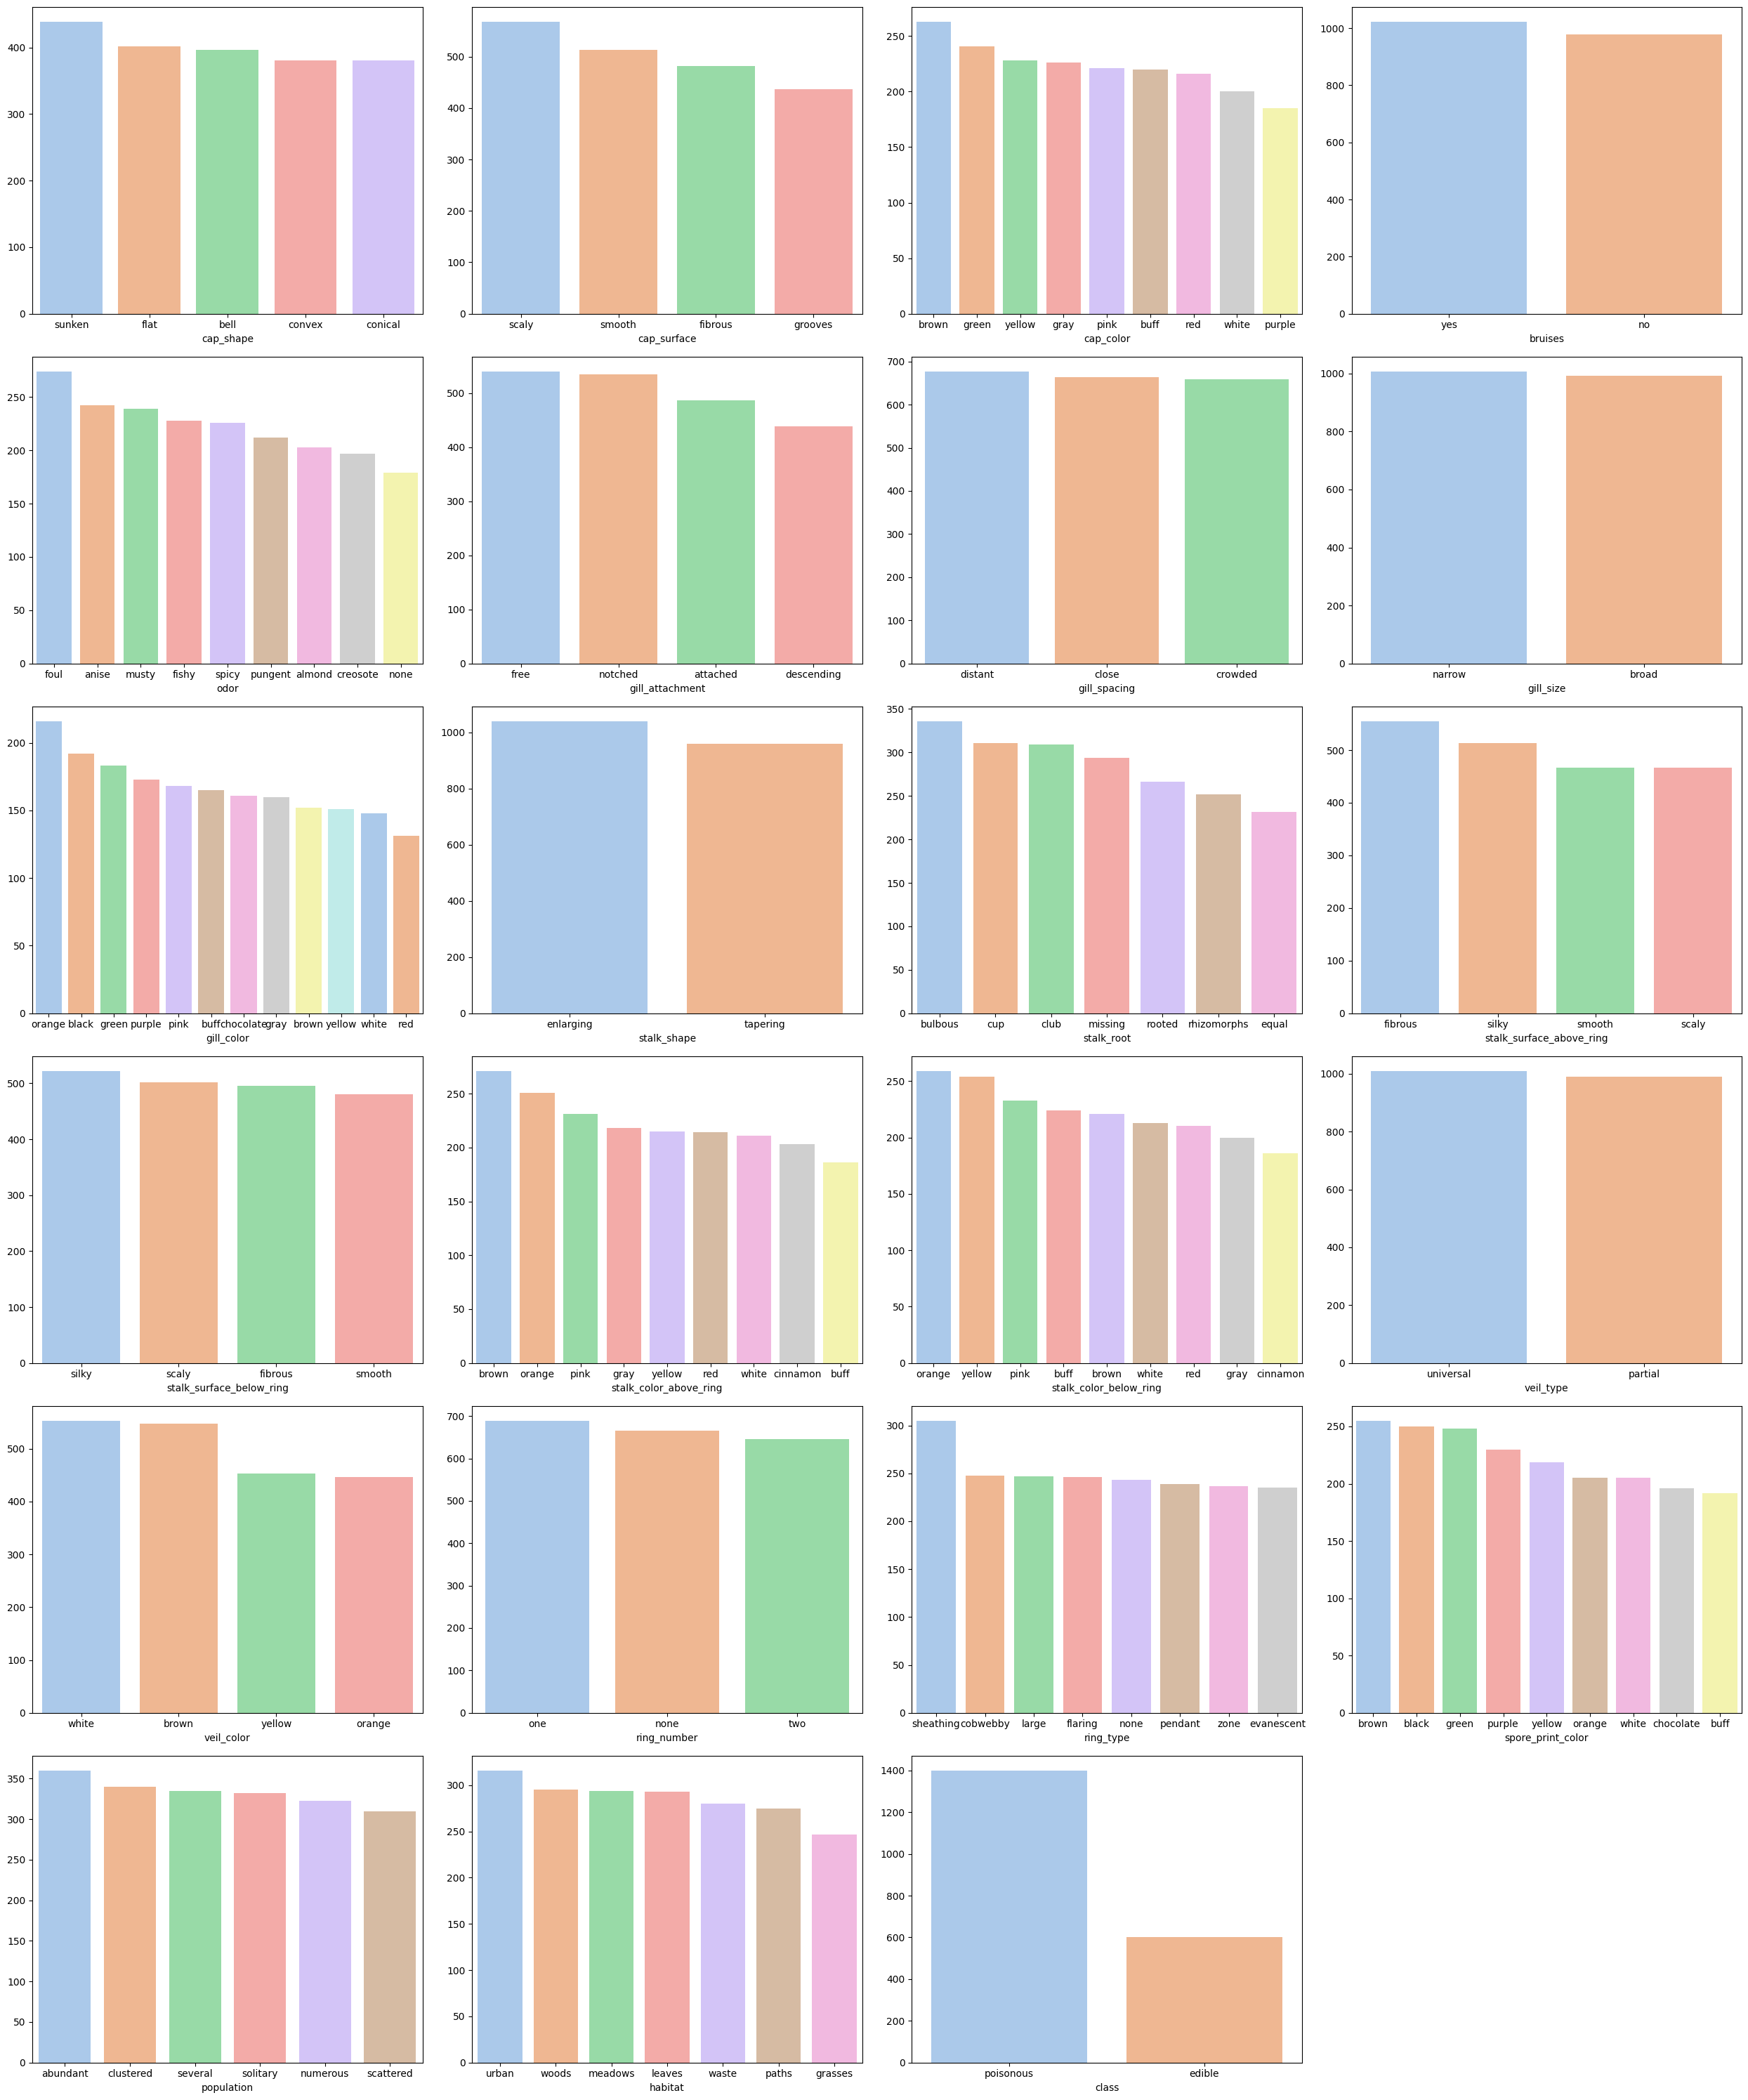

In [52]:

cat_data = df.select_dtypes(['object'])
n_plots = cat_data.shape[1]
n_cols = 4
n_rows = (n_plots + n_cols) // n_cols

fig,ax = plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(25,n_rows*5))
ax = ax.flatten()

for idx,cols in enumerate(cat_data.columns):
  sns.barplot(x=df[cols].value_counts().index, y=df[cols].value_counts().values, ax=ax[idx], errorbar=None, palette=color)

for i in range(n_plots,len(ax)):
  fig.delaxes(ax[i])
plt.tight_layout()

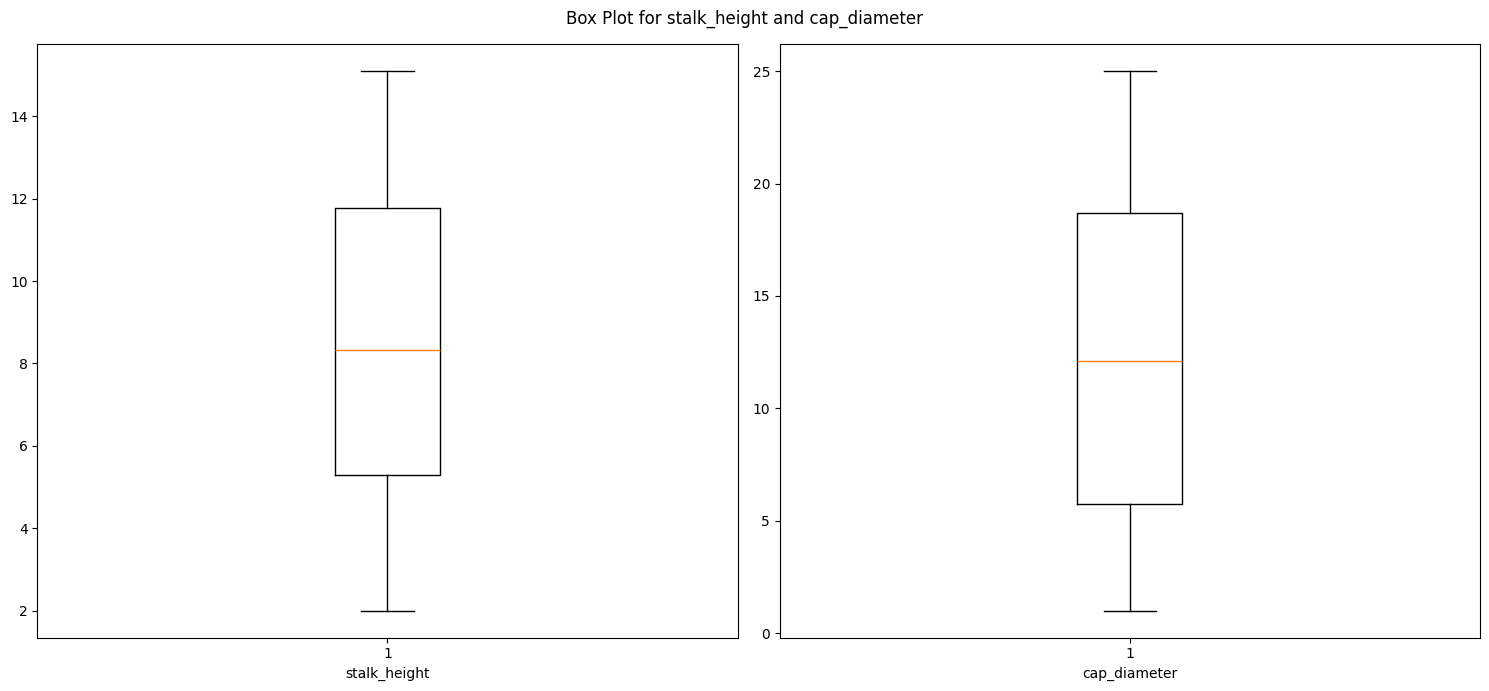

In [53]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

ax[0].boxplot(df['stalk_height'])
ax[0].set_xlabel('stalk_height')

ax[1].boxplot(df['cap_diameter'])
ax[1].set_xlabel('cap_diameter')
fig.suptitle('Box Plot for stalk_height and cap_diameter')
plt.tight_layout()

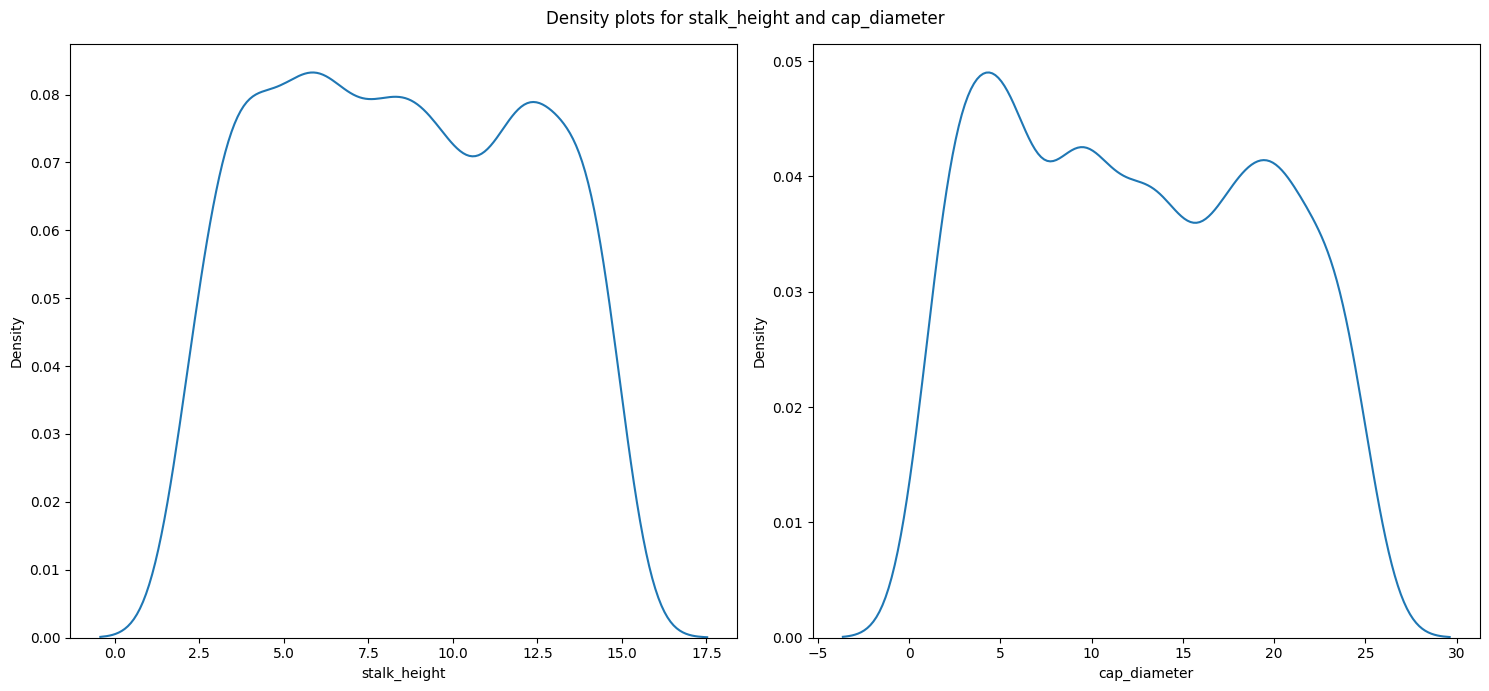

In [54]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,7))

sns.kdeplot(df['stalk_height'],ax=ax[0])
ax[0].set_xlabel('stalk_height')

sns.kdeplot(df['cap_diameter'],ax=ax[1])
ax[1].set_xlabel('cap_diameter')
fig.suptitle('Density plots for stalk_height and cap_diameter')
plt.tight_layout()

Observations:

Values range roughly from 0 to 17

The distribution is multimodal (multiple peaks)

Major concentration between 3 and 14

No extreme right or left skew

Smooth, continuous shape → suitable for KDE

Observations:

Values range roughly from 0 to 30

Slight right skew

Multiple peaks around 5–10 and 18–22

Wider spread compared to stalk height

In [55]:
numeric_df = df.select_dtypes(['float'])

numeric_df.corr()

,stalk_height,cap_diameter
stalk_height,1.000000,-0.003486
cap_diameter,-0.003486,1.000000


# Data Preprocessing

In [56]:
df.nunique()

,0
cap_shape,5
cap_surface,4
cap_color,9
bruises,2
odor,9
gill_attachment,4
gill_spacing,3
gill_size,2
gill_color,12
stalk_shape,2


In [57]:
new_df = pd.get_dummies(df,drop_first=True).astype('int');new_df.head()

,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_buff,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,14,5,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,3,19,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9,7,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,5,20,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14,12,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x = new_df.drop(['class_poisonous'],axis=1)
y = new_df['class_poisonous']

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=30)

# Data Visualization

In [61]:
new_df.head()

,stalk_height,cap_diameter,cap_shape_conical,cap_shape_convex,cap_shape_flat,cap_shape_sunken,cap_surface_grooves,cap_surface_scaly,cap_surface_smooth,cap_color_buff,...,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods,class_poisonous
0,14,5,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,3,19,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,9,7,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,5,20,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14,12,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [62]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(n_components=2)

In [64]:
data = pca.fit_transform(x);data[:5]

array([[-6.78522054,  6.08463146],
       [ 7.15188066, -4.99841155],
       [-4.81146852,  1.07132533],
       [ 8.18061247, -2.99897245],
       [ 0.22112849,  6.03334787]])

In [65]:
np.cumsum(np.round((pca.explained_variance_ratio_),4)*100)


array([65.05, 83.01])

In [66]:
pca_df = pd.DataFrame(data,columns=['PC1','PC2']);pca_df.head()

,PC1,PC2
0,-6.785221,6.084631
1,7.151881,-4.998412
2,-4.811469,1.071325
3,8.180612,-2.998972
4,0.221128,6.033348


<Axes: xlabel='PC1', ylabel='PC2'>

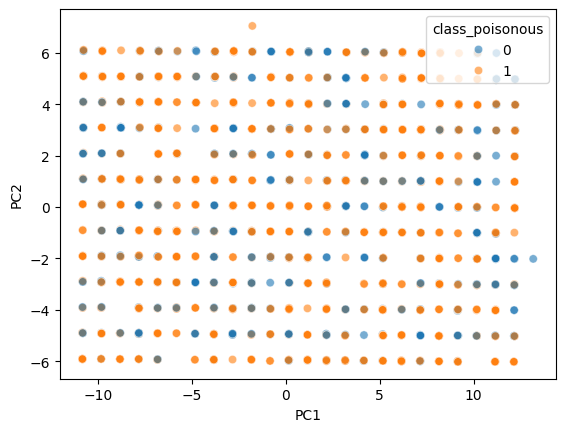

In [67]:
sns.scatterplot(x=pca_df['PC1'],y=pca_df['PC2'],hue=y,alpha=0.6)

The PCA scatter plot of the first two principal components shows substantial overlap between edible and poisonous mushroom classes. This indicates that the data is not linearly separable in the reduced two-dimensional space. Additionally, the discrete distribution of points reflects the categorical nature of the original features after encoding. Since class separation is not clearly visible along individual principal components, this suggests that the discriminative information is distributed across multiple dimensions. Therefore, a non-linear SVM kernel such as RBF is suitable for modeling the complex decision boundaries in the dataset.

<Axes: xlabel='class_poisonous'>

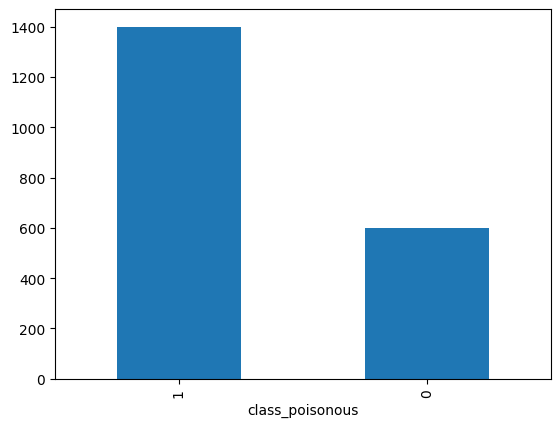

In [68]:
y.value_counts().plot(kind='bar')

In [69]:
y.value_counts()

,count
class_poisonous,
1,1400
0,600


This clearly shows the dataset has imbalance of classes

# SVM Implementation

In [70]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [71]:
model = SVC()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [72]:
print('Testing Accuracy : ', accuracy_score(y_test,pred))
print('Training Accurarcy: ', model.score(x_train,y_train))

Testing Accuracy :  0.7166666666666667
Training Accurarcy:  0.6928571428571428


In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       170
           1       0.72      1.00      0.83       430

    accuracy                           0.72       600
   macro avg       0.36      0.50      0.42       600
weighted avg       0.51      0.72      0.60       600



In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [75]:
param = {
    'kernel' : ['Linear','rbf','ploy'],
    'C': [0.1, 1, 10, 100],
    'gamma' : ['scale', 'auto', 0.01, 0.1, 1]
}

In [76]:

grid_search_model_1 = GridSearchCV(estimator=SVC(),param_grid=param,cv=5)

In [77]:
grid_search_model_1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['Linear', 'rbf', 'ploy']})

In [78]:
grid_search_model_1.best_score_

np.float64(0.8407142857142856)

In [79]:
grid_search_model_1.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

Predicting the model with Test data(Parameters obtained from GridSearchCV)

In [80]:
new_model = SVC(C=1,gamma = 1, kernel='rbf')

In [81]:
new_model.fit(x_train,y_train)

SVC(C=1, gamma=1)

In [82]:
pred_model = new_model.predict(x_test)

In [83]:
print(classification_report(y_test,pred_model))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73       170
           1       0.85      1.00      0.92       430

    accuracy                           0.88       600
   macro avg       0.93      0.79      0.82       600
weighted avg       0.90      0.88      0.87       600



1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

Radial Basis Function (RBF) is best for this model because of the data is Non Linear in Nature. C is a regularization parameter and gamma controls the influence of individual training samples



2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

Strength:
1.   Handles non-linear data well.
2.   Works well in high dimensions. - Suitable after encoding, even when feature count increases.
3.   High accuracy & good generalization - Proper tuning of C and gamma helps avoid overfitting & underfitting.
4.   Effective for binary classification - Mushroom dataset has a clear edible vs poisonous target


Weakness:

1. Low interpretability - No clear feature importance and decision boundaries

3.	Discuss practical implications of SVM in real-world classification tasks.


* Suitable for high-risk decisions (e.g., poisonous vs edible).

* Performs well on non-linear classification problems.

* Strong generalization on small to medium datasets.